<a href="https://colab.research.google.com/github/FarahKhankishiyeva13/University/blob/main/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.3 MB/s 
     |████████████████████████████████| 1.4 MB 9.5 MB/s 


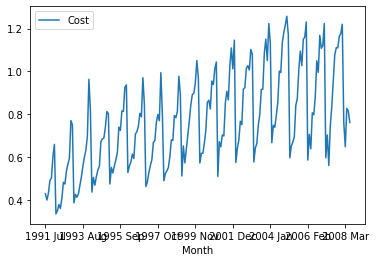

In [2]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [3]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


Using the above data set 
1)Test stationary of the 
dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criteri metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? Plot test, train and forecast values for the Holt Winters' method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

8) Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. Do we have dampened model or not. ).Briefly explain why? Plot test, train and forecast values for the ETS method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

9) Use TBATS model in train data.  Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS  method. in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

10) Which model gives the lowes MAPE score?

In [4]:
#Question 1
#1)Test stationary of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

#testing for Stationary

from statsmodels.tsa.stattools import adfuller
result = adfuller(ap1['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.696756
p-value: 0.432785
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Answer for Question 1:

H0:Series is not stationary Ha:Series is stationary

Since p-value is greater than 0.05(alpha-significance level), we fail to reject the null hypothesis. So, the series is not stationary.

,Cost
Month,
1991 Jul,NaN
1991 Aug,-0.028889
1991 Sep,0.031253
1991 Oct,0.060384
1991 Nov,0.009826
...,...
2008 Feb,-0.458119
2008 Mar,-0.112387
2008 Apr,0.178452


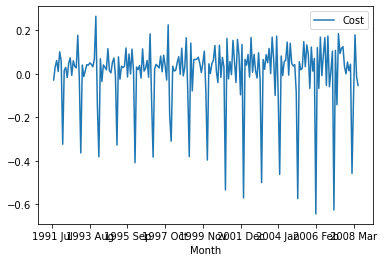

In [5]:
#Question 2
#2)Take difference and seasonal difference and test stationay of the dataset.
#Write hypothesis. What is your conclusion at 5% siginifance level?

dap1 = ap1 - ap1.shift(1)
dap1.plot()
dap1

**As it can be observed, there is an "NaN" in the first value due to taking the difference. Therefore, it is necessary to drop "NaN" value before proceeding with the statitonarity test.**

In [6]:
dap1=dap1.dropna()
from statsmodels.tsa.stattools import adfuller
result = adfuller(dap1['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.365938
p-value: 0.012176
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


,Cost
Month,
1991 Jul,NaN
1991 Aug,NaN
1991 Sep,NaN
1991 Oct,NaN
1991 Nov,NaN
...,...
2008 Feb,0.164069
2008 Mar,-0.054963
2008 Apr,0.266127


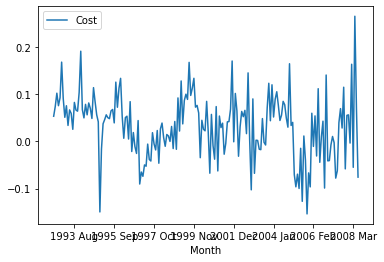

In [7]:
dap2 = ap1 - ap1.shift(12)
dap2.plot()
dap2

In [8]:
dap2=dap2.dropna()
from statsmodels.tsa.stattools import adfuller
result = adfuller(dap2['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.368644
p-value: 0.012075
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


Answer for Question 2:

H0:Series is not stationary Ha:Series is stationary

For a one lag differenced series => Since p-value=0.012176 is less than alpha=0.05, we reject the null hypothesis, and conclude that the series is stationary.

Seasonal difference (or 12 lags difference) => Since p-value=0.012075 is less than alpha=0.05, we reject the null hypothesis, and conclude that the series is stationary.

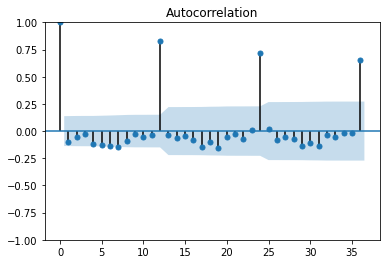

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


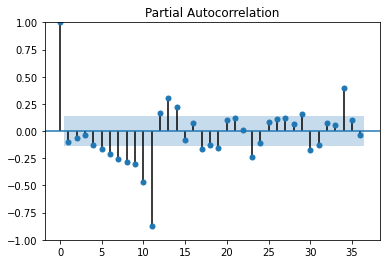

In [9]:
#Question 3
# 3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(dap1['Cost'], lags=36)
plt.show()
fig = tsaplots.plot_pacf(dap1['Cost'], lags=36)
plt.show()

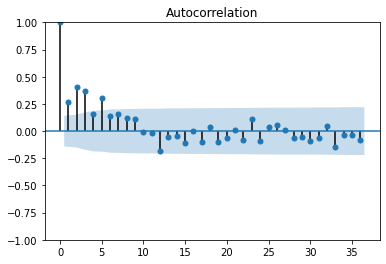

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


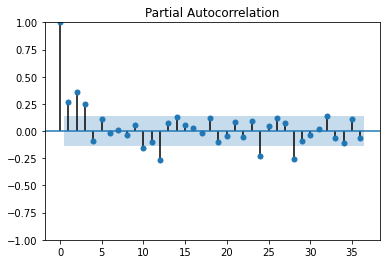

In [10]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(dap2['Cost'], lags=36)
plt.show()
fig = tsaplots.plot_pacf(dap2['Cost'], lags=36)
plt.show()

In [11]:
#Question 4
#4) Based on the plot of ACF and PACF, come up with two SARIMA model 
#and compare their Akaike Information Criteri metric.


from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Cost'],order=(1,1,1),seasonal_order=(0,1,1,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Cost   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 281.939
Date:                            Wed, 25 May 2022   AIC                           -555.878
Time:                                    16:11:36   BIC                           -542.868
Sample:                                07-01-1991   HQIC                          -550.608
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2748      0.083     -3.328      0.001      -0.437      -0.113
ma.L1         -0.5873      0.069     -8.486      0.000      -0.723      -0.452
ma.S.L12      -0.5327      0.061     -8.722      0.000      -0.652      -0.413
sigma2         0.0030      0.000     10.235      0.000       0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.97   Prob(JB):                         0.39
Heteroskedasticity (H):               2.09   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Cost'],order=(1,1,1),seasonal_order=(2,1,2,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                    Cost   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                 285.800
Date:                                 Wed, 25 May 2022   AIC                           -557.600
Time:                                         16:11:56   BIC                           -534.834
Sample:                                     07-01-1991   HQIC                          -548.378
                                          - 06-01-2008                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2095      0.084     -2.502      0.012      -0.374      -0.045
ma.L1         -0.6492      0.063    -10.380      0.000      -0.772      -0.527
ar.S.L12       1.0625      0.191      5.553      0.000       0.687       1.438
ar.S.L24      -0.2120      0.156     -1.360      0.174      -0.517       0.093
ma.S.L12      -1.6543      0.204     -8.112      0.000      -2.054      -1.255
ma.S.L24       0.7587      0.156      4.856      0.000       0.453       1.065
sigma2         0.0028      0.000     10.376      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.54
Prob(Q):                              0.97   Prob(JB):                         0.17
Heteroskedasticity (H):               2.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Answer for Question 4:

AIC for the second model (-557.600) is less than AIC for the first model (-552.329). Thus, SARIMAX(1, 1, 1)x(2, 1, [1, 2], 12) model is preferred over SARIMAX(1, 1, 1)x(0, 1, 1, 12) model. 


In [13]:
#Question5
#5) Split data into train and test. For the test data, use last 12 months observation.
train=ap1[:-12]
test=ap1[-12:]
train

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2007 Feb,0.597753
2007 Mar,0.704398
2007 Apr,0.561760


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


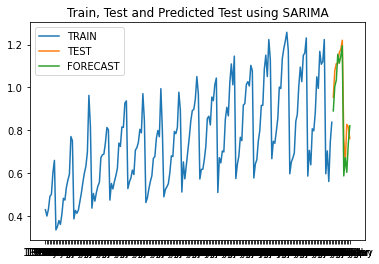

In [14]:
#Question 6
#Plot test, train and forecast values for the SARIMA model chosen at Q4. 
#Evaluate performance of the model in terms of 
#MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Cost'],order=(1,1,1), seasonal_order=(2,1,2,12))
model_fit=model.fit()
test_prediction = model_fit.forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']
#As we take ln , convert back to original series using exp


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using SARIMA');

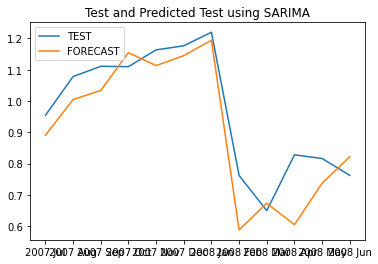

In [15]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using SARIMA');

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.07714268804168524
Mean Squared Error = 0.009338184660602768
Mean Absolute Percentage Error = 8.7075359118698


In [17]:
#Question 7
#7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? 
#Plot test, train and forecast values for the Holt Winters' method. 
#Evaluate performance of the model in terms 
#of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

 Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? 

The additive method is preferred when the seasonal variations are roughly constant through the series, while the multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series. As we can see from the Holt Winters' model shown below, the seasonal variations are roughly constant; therefore, the additive model is preferred. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


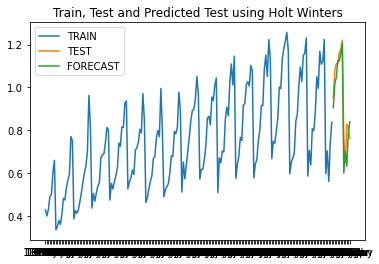

In [18]:
#Plot test, train and forecast values for the Holt Winters' method. 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_prediction = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters');

In [19]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.06513513772255573
Mean Squared Error = 0.007204818383369751
Mean Absolute Percentage Error = 7.5956025277059425


In [20]:
#Question 8
#8)Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. 
#Do we have dampened model or not. ).Briefly explain why? 
#Plot test, train and forecast values for the ETS method. 
#Evaluate performance of the model in terms 
#of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. Do we have dampened model or not.).Briefly explain why? 


The additive method is preferred when the seasonal variations are roughly constant through the series, while the multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series. As we can see from the ETS model shown below, the seasonal variations are roughly constant; therefore, the additive model is preferred. Moreover, we have a dampened model, because the series are increasing at a decreasing rate. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


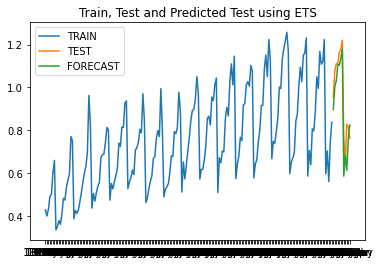

In [21]:
#Plot test, train and forecast values for the ETS method. 
#Evaluate performance of the model in terms 
#of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

import numpy as np
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_prediction=ETSModel(train['Cost'],error='mul', trend='mul',seasonal='mul',damped_trend=True, seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ETS');

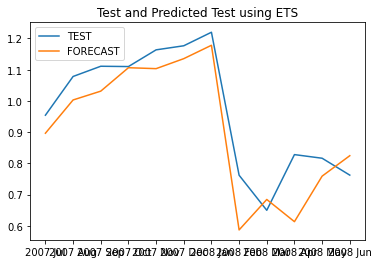

In [22]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using ETS');

In [23]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.07535343950389495
Mean Squared Error = 0.008976048645058084
Mean Absolute Percentage Error = 8.513081505501567


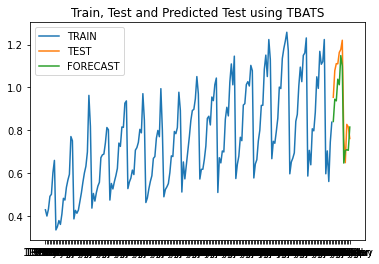

In [24]:
#Question 9
#9) Use TBATS model in train data. 
#Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS method. 
#in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

from tbats import TBATS, BATS# Fit the model
estimator = TBATS(
    seasonal_periods=[12],
    use_arma_errors=False,  # shall not try only models with ARMA
    use_box_cox=False # will not use Box-Cox
)
model = estimator.fit(train)
test_prediction = model.forecast(steps=12)

test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using TBATS');

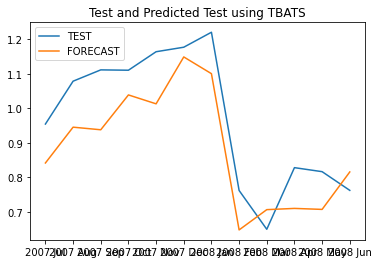

In [ ]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using TBATS');

In [25]:
#Evaluate forecasting Performance -TBATS
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.10345093536180565
Mean Squared Error = 0.012378694237250612
Mean Absolute Percentage Error = 10.81564711343515


In [26]:
#Question 10
#10)Which model gives the lowes MAPE score?

Answer for Question 10:
Holt Winter's model gives the lowest MAPE score. 